In [ ]:
!pip install keras-tuner --quiet

In [174]:
import pandas as pd
from io import StringIO


# Convertir la cadena CSV en un dataframe
train_base = pd.read_csv('train.csv')
print(train_base.columns, train_base.shape)
test_base = pd.read_csv('test.csv')
print(test_base.columns, test_base.shape)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') (8693, 14)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object') (4277, 13)


In [175]:
#categorice to numeric
train = train_base.copy()

#factorize homeplanet
train['HomePlanet'] ,HomePlanet = pd.factorize(train_base['HomePlanet'])
print(HomePlanet)

#factorize Destination
train['Destination'] ,Destination = pd.factorize(train_base['Destination'])
print(Destination)

#factorize Cabin
train['Cabin'] ,Cabin = pd.factorize(train_base['Cabin'])
print(Cabin)

train

Index(['Europa', 'Earth', 'Mars'], dtype='object')
Index(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype='object')
Index(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S',
       'B/1/P', 'F/1/P',
       ...
       'G/1505/P', 'G/1497/S', 'G/1507/P', 'F/1894/P', 'G/1508/P', 'A/97/P',
       'A/98/P', 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype='object', length=6560)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0,False,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [176]:
#remove columns dont have relevance information
train = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [177]:
train.astype(float)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,0.0,0.0,2.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0.0,0.0,2.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,1.0,0.0,3.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,6556.0,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,1.0,1.0,6557.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,1.0,0.0,6558.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,0.0,0.0,6559.0,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0


              HomePlanet     Cabin  Destination       Age  RoomService  \
HomePlanet      1.000000 -0.004802    -0.212843 -0.120503     0.178878   
Cabin          -0.004802  1.000000    -0.000167 -0.007797    -0.003791   
Destination    -0.212843 -0.000167     1.000000  0.004248    -0.044733   
Age            -0.120503 -0.007797     0.004248  1.000000     0.068723   
RoomService     0.178878 -0.003791    -0.044733  0.068723     1.000000   
FoodCourt      -0.279357 -0.009717     0.110659  0.130421    -0.015889   
ShoppingMall    0.077910  0.019949    -0.022977  0.033133     0.054480   
Spa            -0.203228 -0.009816     0.053614  0.123970     0.010080   
VRDeck         -0.228913  0.015029     0.073654  0.101007    -0.019581   
Transported    -0.094689  0.021866     0.104817 -0.075026    -0.244611   

              FoodCourt  ShoppingMall       Spa    VRDeck  Transported  
HomePlanet    -0.279357      0.077910 -0.203228 -0.228913    -0.094689  
Cabin         -0.009717      0.019949 -

/tmp/ipykernel_32/3872156919.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


<AxesSubplot: >

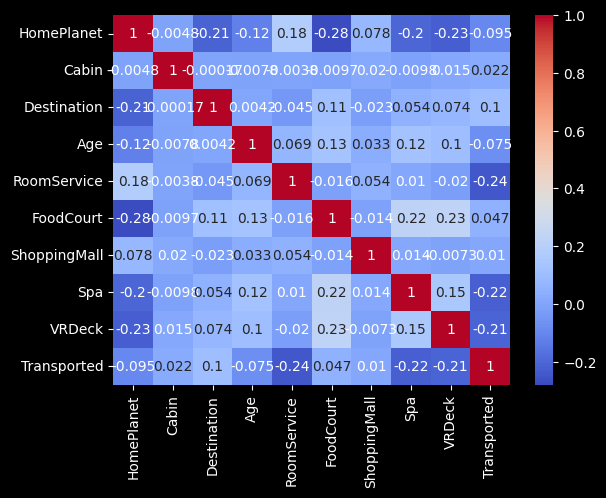

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Calcular la matriz de correlación
corr_matrix = train.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


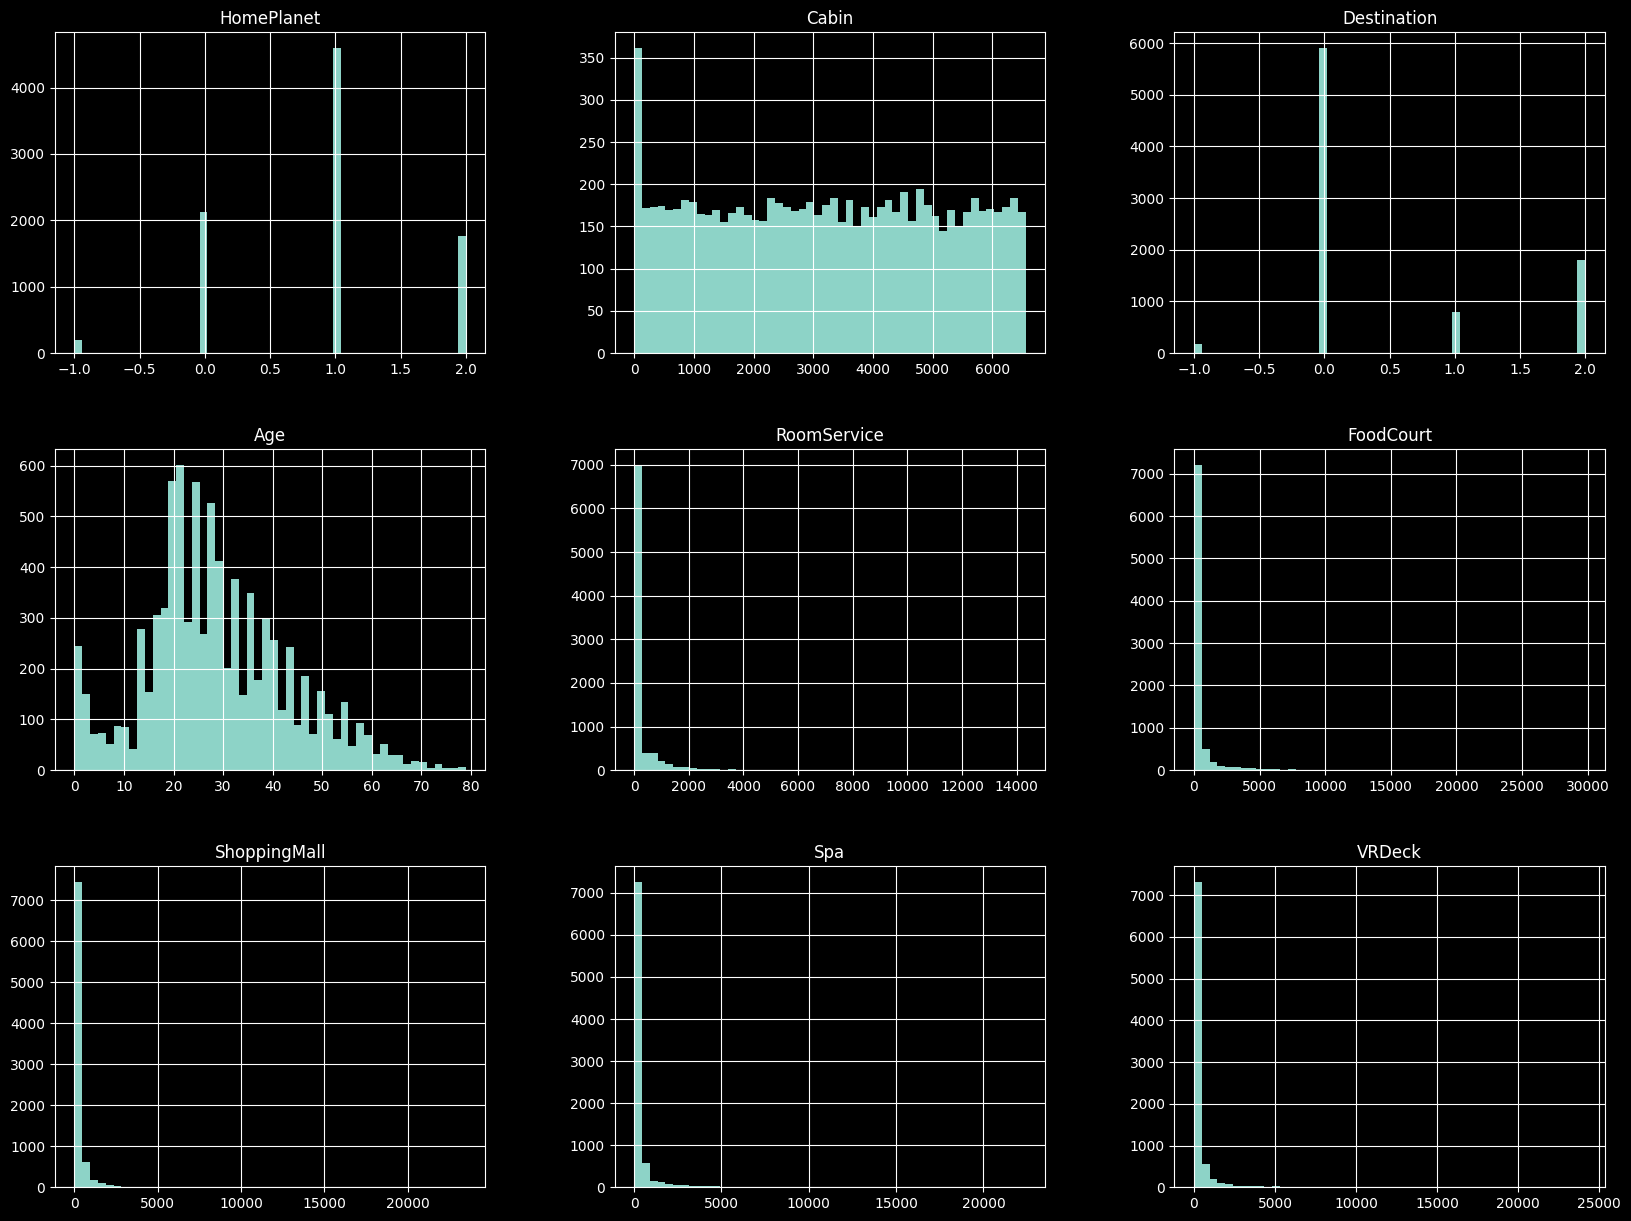

In [179]:
#generate histogram for each numeric variable
train.hist(bins=50, figsize=(20,15))
plt.show()


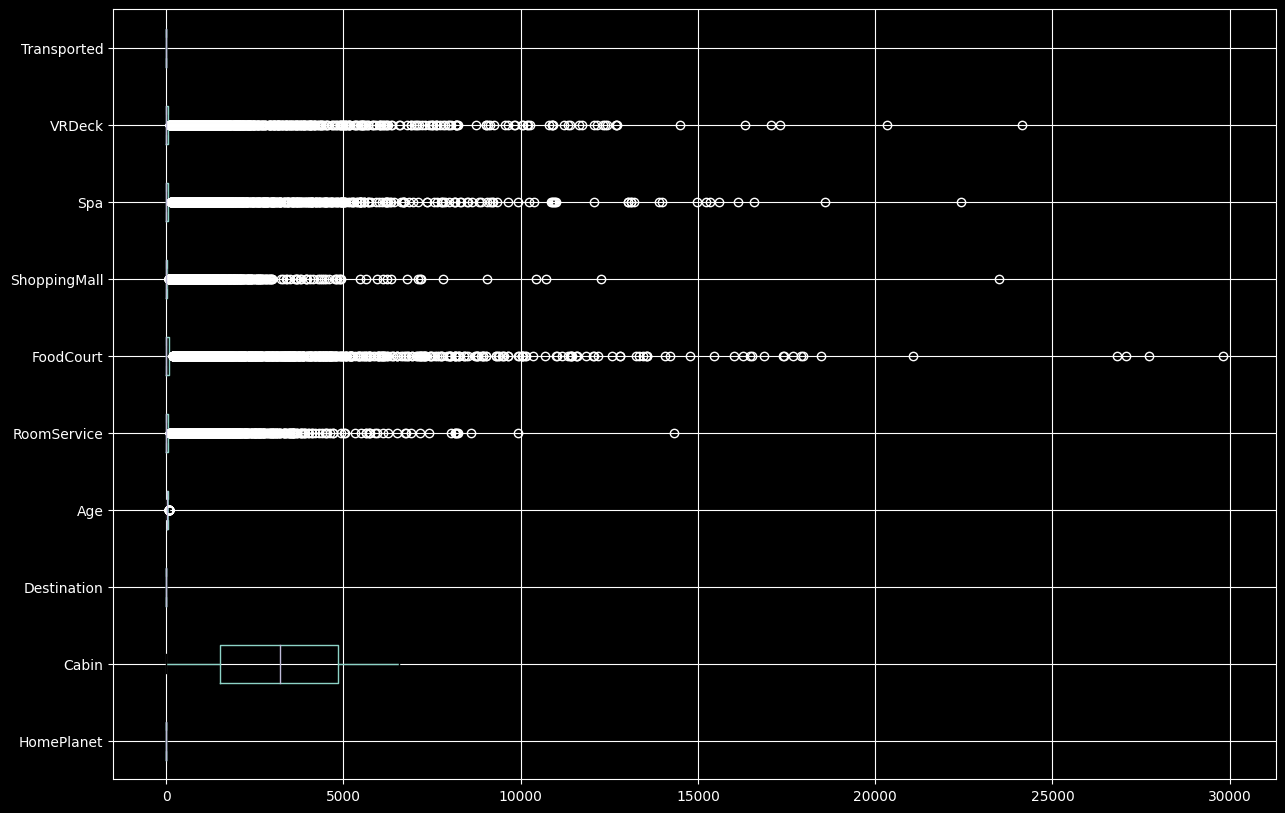

In [180]:

# draw boxplots for all numeric columns horizontally
train.boxplot(vert=False, figsize=(15,10))
plt.show()

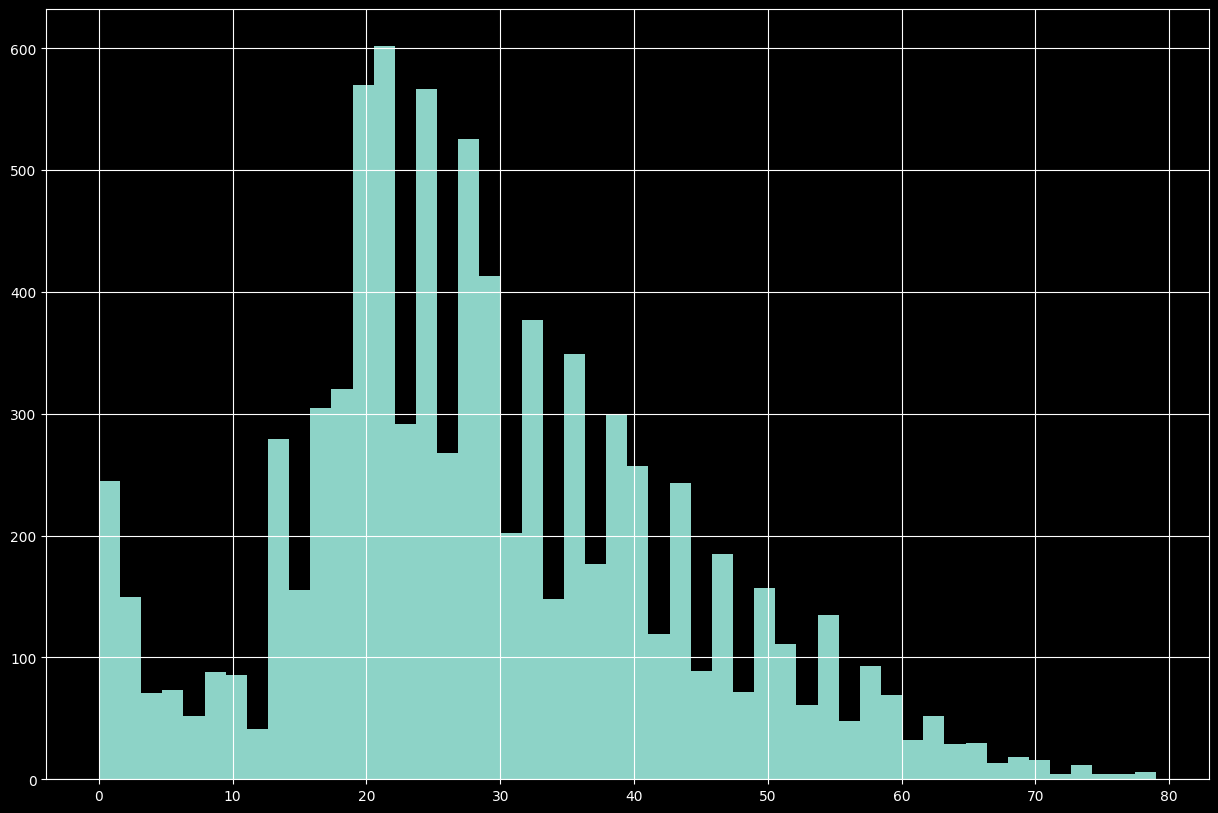

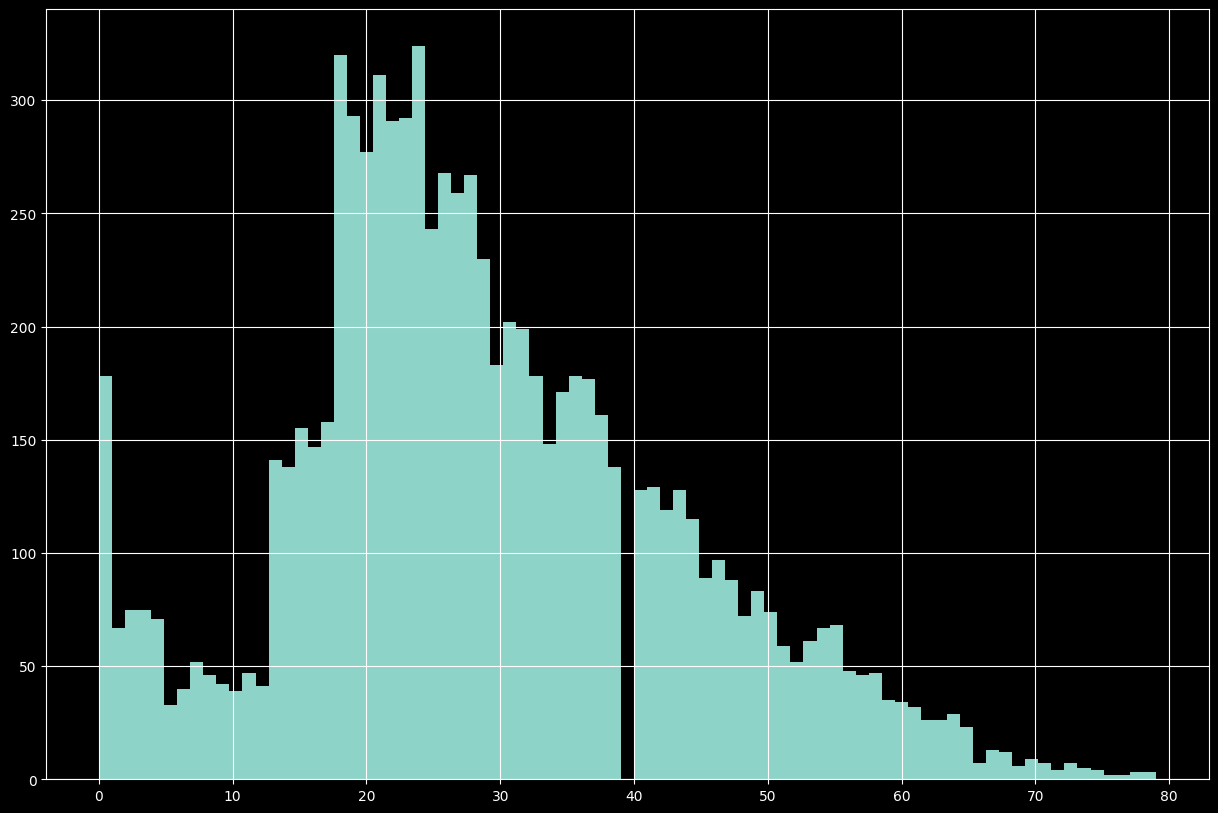

In [181]:
#age Analysis
# Age histogram
train['Age'].hist(bins=50, figsize=(15,10))
plt.show()
#unique values histogram
train['Age'].hist(bins=len(train['Age'].unique()), figsize=(15,10))
plt.show()

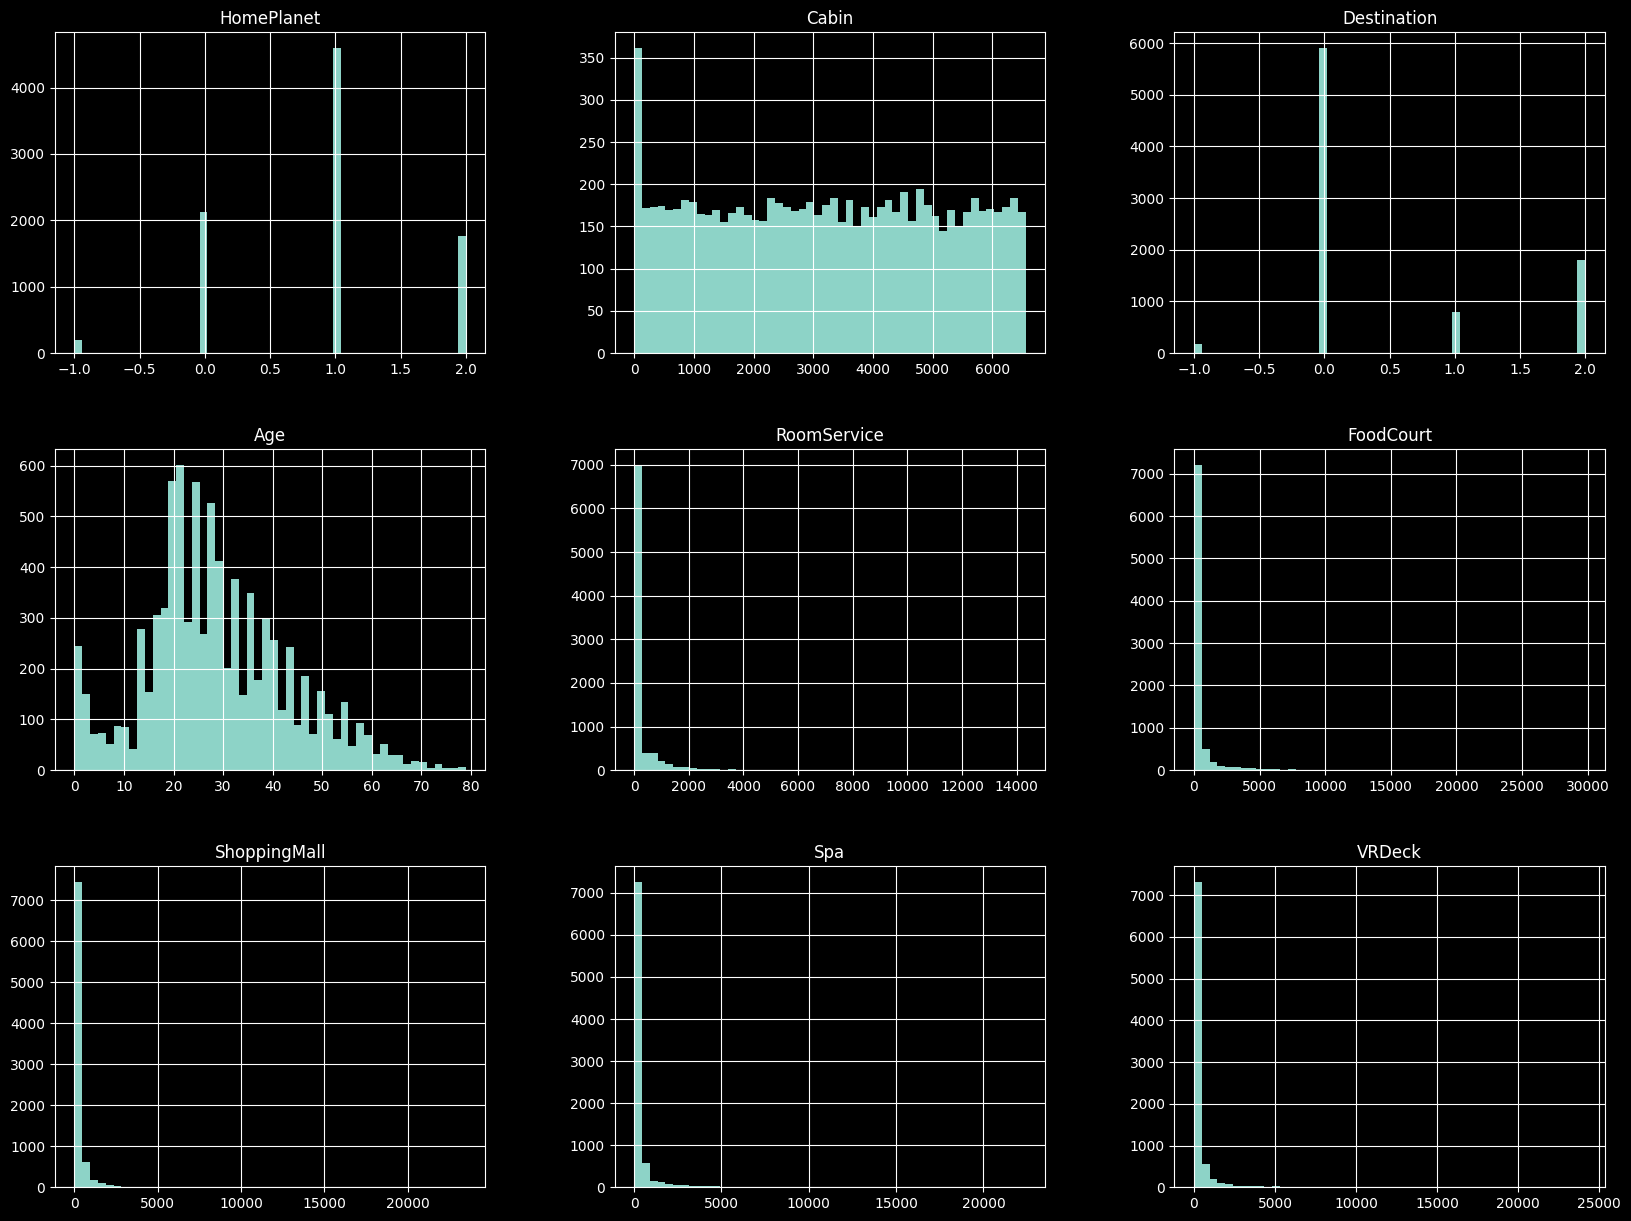

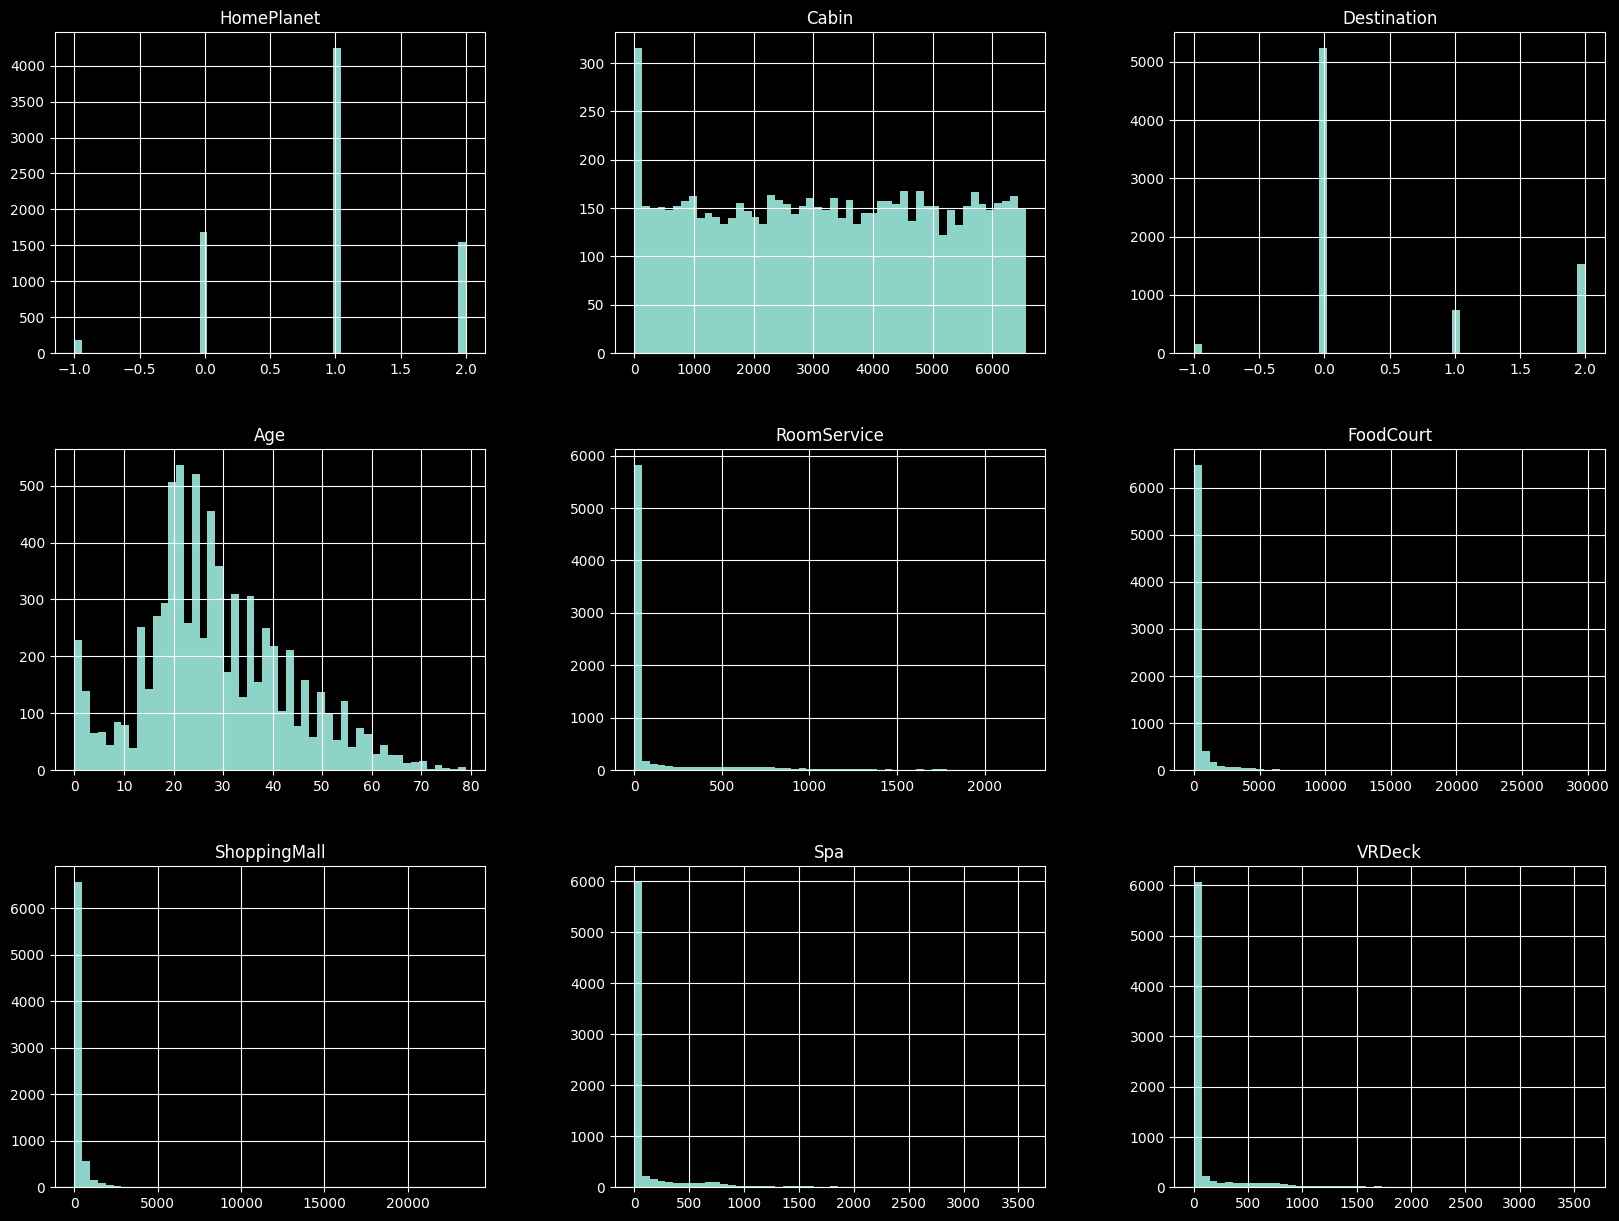

In [336]:
#simple remove of outers
filtro = 0.98
train_filtered = train.copy()

# train_filtered = train_filtered[train_filtered.VRDeck > train_filtered.VRDeck.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.Spa > train_filtered.Spa.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.RoomService > train_filtered.RoomService.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.ShoppingMall > train_filtered.ShoppingMall.quantile(0.25)]
# train_filtered = train_filtered[train_filtered.FoodCourt > train_filtered.FoodCourt.quantile(0.25)]

train_filtered.hist(bins=50, figsize=(20,15))
plt.show()

# #and filter > 95%
train_filtered = train_filtered[train_filtered.VRDeck < train_filtered.VRDeck.quantile(filtro)]
train_filtered = train_filtered[train_filtered.Spa < train_filtered.Spa.quantile(filtro)]
train_filtered = train_filtered[train_filtered.RoomService < train_filtered.RoomService.quantile(filtro)]




train_filtered.hist(bins=50, figsize=(20,15))
plt.show()

In [337]:
train_filtered

/usr/local/lib/python3.9/dist-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,False,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True
3,0,False,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,3,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,1,False,4,1,44.0,False,0.0,483.0,0.0,291.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,False,6556,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,1,True,6557,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,1,False,6558,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,0,False,6559,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


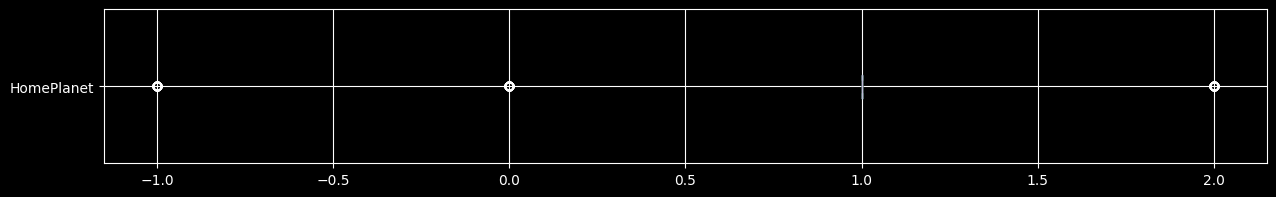

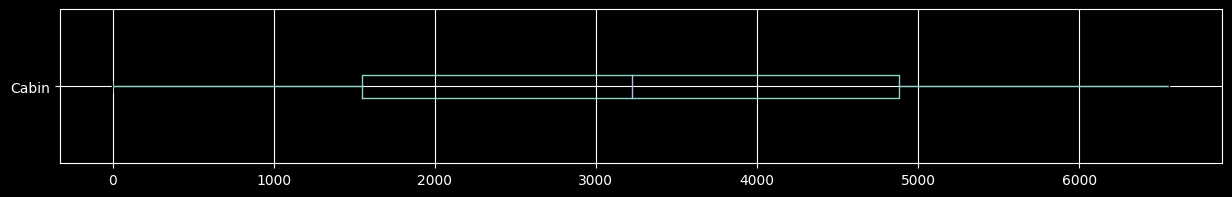

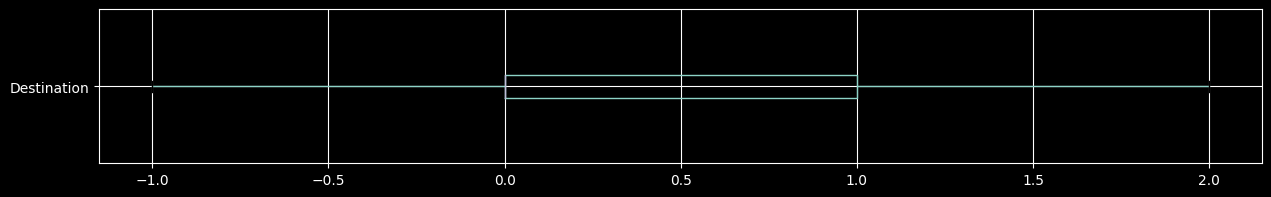

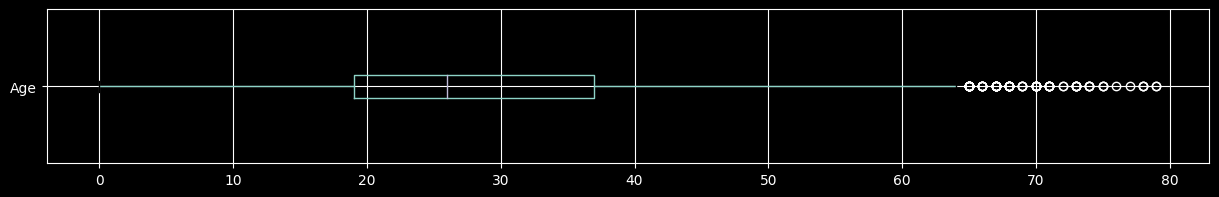

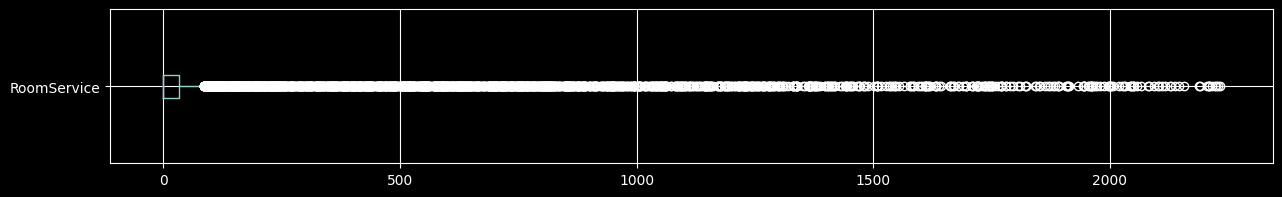

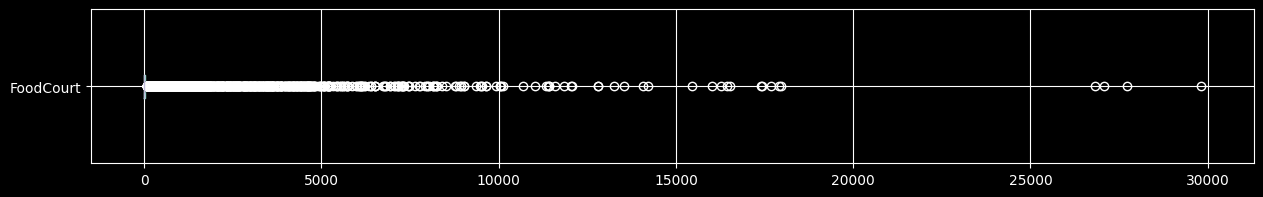

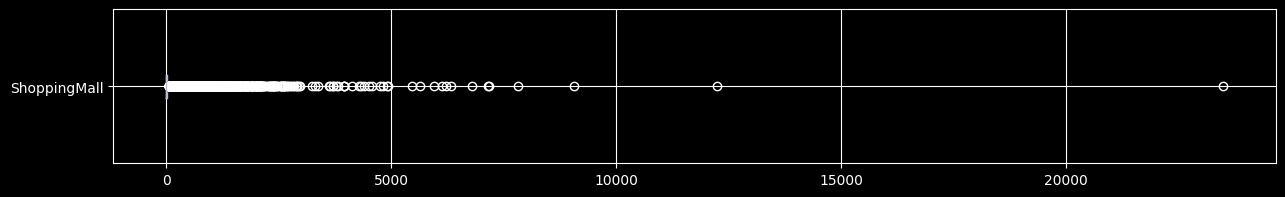

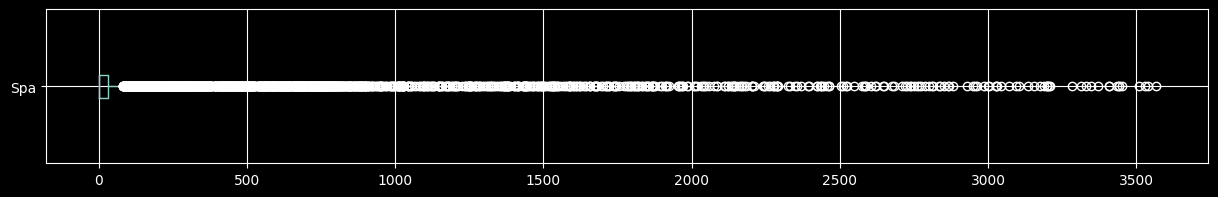

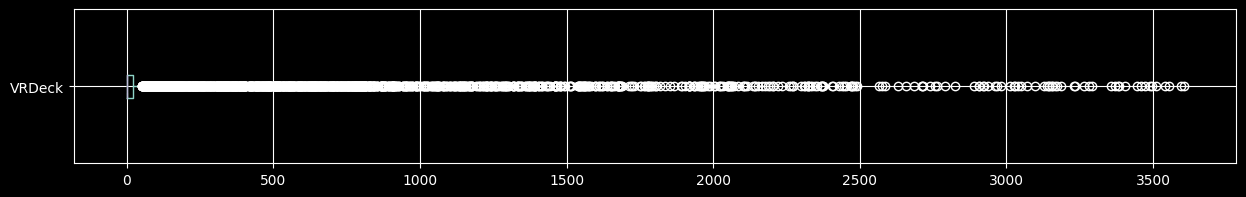

In [338]:
import matplotlib.pyplot as plt

# draw boxplots for all numeric columns horizontally
for col in train_filtered.select_dtypes(include=['float64','int64']).columns:
    train_filtered.boxplot(column=col, vert=False, figsize=(15,2))
    plt.show()

<AxesSubplot: xlabel='Transported', ylabel='count'>

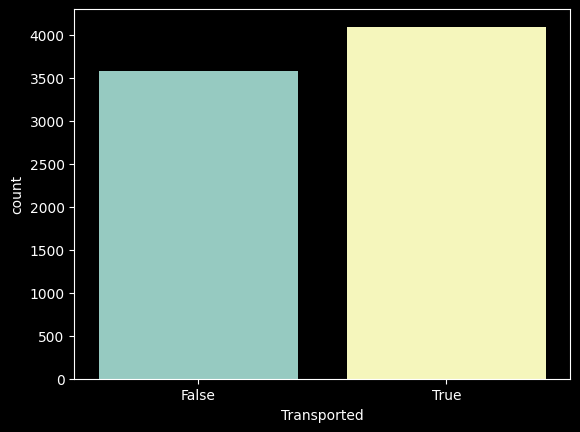

In [339]:
#grafico transported
sns.countplot(x='Transported', data=train_filtered)

In [340]:
N_transp_true = train_filtered[train_filtered['Transported'] == 1].shape[0]
N_transp_false = train_filtered[train_filtered['Transported'] == 0].shape[0]

print('metrica >' , 1-(N_transp_true/(N_transp_true+N_transp_false)))

metrica > 0.4665536575824749


              HomePlanet     Cabin  Destination       Age  RoomService  \
HomePlanet      1.000000 -0.006320    -0.202672 -0.102733     0.252766   
Cabin          -0.006320  1.000000     0.000063  0.000502    -0.003844   
Destination    -0.202672  0.000063     1.000000 -0.006593    -0.087264   
Age            -0.102733  0.000502    -0.006593  1.000000     0.091226   
RoomService     0.252766 -0.003844    -0.087264  0.091226     1.000000   
FoodCourt      -0.260345 -0.009911     0.095943  0.115156    -0.041410   
ShoppingMall    0.086556  0.022935    -0.025005  0.036560     0.056330   
Spa            -0.139437  0.015055    -0.002880  0.122089    -0.022077   
VRDeck         -0.200456  0.007489     0.033926  0.111047    -0.039961   
Transported    -0.141107  0.016436     0.132746 -0.055033    -0.294997   

              FoodCourt  ShoppingMall       Spa    VRDeck  Transported  
HomePlanet    -0.260345      0.086556 -0.139437 -0.200456    -0.141107  
Cabin         -0.009911      0.022935  

/tmp/ipykernel_32/844498082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_filtered.corr()


<AxesSubplot: >

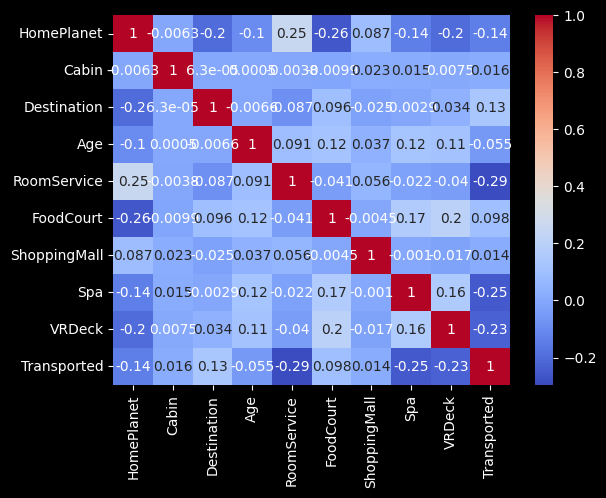

In [341]:
# Calcular la matriz de correlación
corr_matrix = train_filtered.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [344]:
train_ready = train_filtered[["HomePlanet", "RoomService", "Spa", "VRDeck",'Transported']].copy()
train_ready


,HomePlanet,RoomService,Spa,VRDeck,Transported
0,0,0.0,0.0,0.0,False
1,1,109.0,549.0,44.0,True
3,0,0.0,3329.0,193.0,False
4,1,303.0,565.0,2.0,True
5,1,0.0,291.0,0.0,True
...,...,...,...,...,...
8688,0,0.0,1643.0,74.0,False
8689,1,0.0,0.0,0.0,False
8690,1,0.0,1.0,0.0,True
8691,0,0.0,353.0,3235.0,False


<AxesSubplot: >

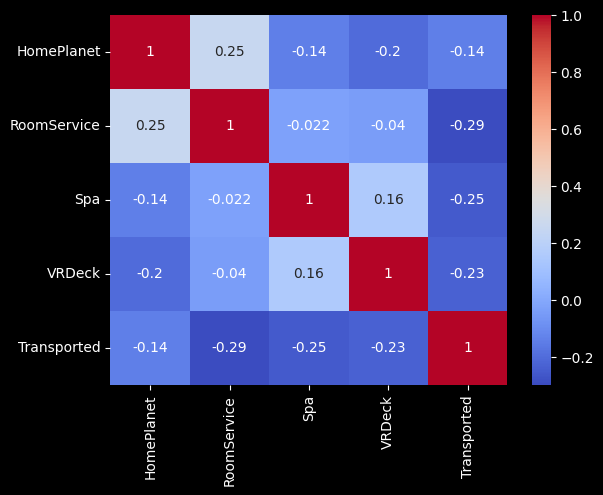

In [345]:
corr_matrix = train_ready.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [347]:
import tensorflow as tf
#optimizador
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

#columns =  train_ready.columns
#remove transported
#columns = columns.drop('Transported')
columns = ["HomePlanet", "RoomService", "Spa", "VRDeck"]

# Seleccionar características y etiquetas
X = train_ready[columns].astype(float)
y = train_ready['Transported'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best LR

In [356]:
import tensorflow as tf
from kerastuner import RandomSearch
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Aquí, configuramos el learning_rate como hiperparámetro para optimizar
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])

    return model




In [358]:
tuner = RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="min"),
    max_trials=5,  # número de combinaciones diferentes de hiperparámetros a probar
    executions_per_trial=3,  # número de veces que se ejecuta cada modelo (reduce la variabilidad en la métrica de desempeño)
    directory='random_search_directory',
    project_name='learning_rate_optimization')

# Presupone que tienes x_train, y_train, x_val, y_val ya preparados
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))


Trial 5 Complete [00h 00m 26s]
val_auc: 0.7801665862401327

Best val_auc So Far: 0.7701421578725179
Total elapsed time: 00h 01m 53s


In [359]:
# Obtiene los mejores hiperparámetros después de realizar la búsqueda
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Extrae el mejor learning_rate del objeto de hiperparámetros
best_learning_rate = best_hp.get('learning_rate')

print(f"El mejor learning_rate encontrado fue: {best_learning_rate}")


El mejor learning_rate encontrado fue: 0.00017051882988302358


# Train

In [360]:


# Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
#lr = 0.01
model.compile(optimizer= Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# stop if val_accuracy not improve and take the best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True)

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


Epoch 1/200
3068/3068 [==============================] - 17s 5ms/step - loss: 0.5522 - accuracy: 0.7457 - auc: 0.7831 - val_loss: 0.5215 - val_accuracy: 0.7666 - val_auc: 0.8355
Epoch 2/200
3068/3068 [==============================] - 14s 5ms/step - loss: 0.5041 - accuracy: 0.7671 - auc: 0.8250 - val_loss: 0.4641 - val_accuracy: 0.7953 - val_auc: 0.8605
Epoch 3/200
3068/3068 [==============================] - 15s 5ms/step - loss: 0.4862 - accuracy: 0.7760 - auc: 0.8402 - val_loss: 0.4497 - val_accuracy: 0.7986 - val_auc: 0.8619
Epoch 4/200
3068/3068 [==============================] - 14s 5ms/step - loss: 0.4842 - accuracy: 0.7721 - auc: 0.8398 - val_loss: 0.4639 - val_accuracy: 0.7979 - val_auc: 0.8605
Epoch 5/200
3068/3068 [==============================] - 15s 5ms/step - loss: 0.4835 - accuracy: 0.7744 - auc: 0.8407 - val_loss: 0.4570 - val_accuracy: 0.7966 - val_auc: 0.8611
Epoch 6/200
3068/3068 [==============================] - 14s 5ms/step - loss: 0.4826 - accuracy: 0.7739 - auc:

In [362]:
#get best model val_accuracy
best_val_accuracy = max(model.history.history['val_accuracy'])
print(f"La mejor val_accuracy del modelo fue: {best_val_accuracy}")

La mejor val_accuracy del modelo fue: 0.805084764957428


# Train Force Variables

In [313]:
import pandas as pd
from itertools import combinations

columns =  train_ready.columns
# Genera todas las combinaciones posibles de las columnas
from itertools import combinations

# Tus columnas
columns = ['HomePlanet', 'Destination', 'RoomService', 'Spa', 'VRDeck']

# Genera todas las combinaciones posibles de las columnas para grupos de 1, 2, 3 y 4
all_combinations = []
for r in range(1, 5):  # Ahora solo va hasta 4
    all_combinations.extend(combinations(columns, r))


len(all_combinations),all_combinations

(30,
 [('HomePlanet',),
  ('Destination',),
  ('RoomService',),
  ('Spa',),
  ('VRDeck',),
  ('HomePlanet', 'Destination'),
  ('HomePlanet', 'RoomService'),
  ('HomePlanet', 'Spa'),
  ('HomePlanet', 'VRDeck'),
  ('Destination', 'RoomService'),
  ('Destination', 'Spa'),
  ('Destination', 'VRDeck'),
  ('RoomService', 'Spa'),
  ('RoomService', 'VRDeck'),
  ('Spa', 'VRDeck'),
  ('HomePlanet', 'Destination', 'RoomService'),
  ('HomePlanet', 'Destination', 'Spa'),
  ('HomePlanet', 'Destination', 'VRDeck'),
  ('HomePlanet', 'RoomService', 'Spa'),
  ('HomePlanet', 'RoomService', 'VRDeck'),
  ('HomePlanet', 'Spa', 'VRDeck'),
  ('Destination', 'RoomService', 'Spa'),
  ('Destination', 'RoomService', 'VRDeck'),
  ('Destination', 'Spa', 'VRDeck'),
  ('RoomService', 'Spa', 'VRDeck'),
  ('HomePlanet', 'Destination', 'RoomService', 'Spa'),
  ('HomePlanet', 'Destination', 'RoomService', 'VRDeck'),
  ('HomePlanet', 'Destination', 'Spa', 'VRDeck'),
  ('HomePlanet', 'RoomService', 'Spa', 'VRDeck'),
  ('De

In [314]:
def train_model_with_columns(selected_columns):
    # Seleccionar características y etiquetas
    X = train_ready[selected_columns].astype(float)
    y = train_ready['Transported'].astype(int)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler =  MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear el modelo
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    #lr = 0.01
    model.compile(optimizer= Adagrad(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

    # stop if val_accuracy not improve and take the best model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=0)
    
    return max(model.history.history['val_accuracy'])

In [315]:
from tqdm import tqdm

# Asume que tienes un dataframe df con tus datos
best_accuracy = 0.0
best_combination = None

convinaciones = pd.DataFrame(columns=['convinacion','val_accuracy'])
with tqdm(total=len(all_combinations)) as pbar:
    for combo in all_combinations:
        combo = list(combo)
        accuracy = train_model_with_columns(combo)

        convinaciones = pd.concat([convinaciones, pd.DataFrame([[combo,accuracy]], columns=['convinacion','val_accuracy'])])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = combo
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_accuracy}")
        pbar.update(1)


print(f"La mejor combinación de columnas es: {best_combination} con un val_accuracy de {best_accuracy}")

convinaciones.sort_values(by=['val_accuracy'], ascending=False)

Best: ['HomePlanet', 'RoomService', 'Spa', 'VRDeck'] - 0.7625178694725037: 100%|██████████| 30/30 [39:42<00:00, 79.42s/it] 

La mejor combinación de columnas es: ['HomePlanet', 'RoomService', 'Spa', 'VRDeck'] con un val_accuracy de 0.7625178694725037


,convinacion,val_accuracy
0,"[HomePlanet, RoomService, Spa, VRDeck]",0.762518
0,"[RoomService, Spa, VRDeck]",0.759657
0,"[Destination, RoomService, Spa, VRDeck]",0.758941
0,"[HomePlanet, Destination, RoomService, Spa]",0.733190
0,"[HomePlanet, RoomService, Spa]",0.728898
0,"[Destination, RoomService, Spa]",0.724607
0,"[RoomService, Spa]",0.724607
0,"[HomePlanet, Destination, Spa, VRDeck]",0.722461
0,"[HomePlanet, Destination, RoomService, VRDeck]",0.718884
0,"[Destination, RoomService, VRDeck]",0.701001


# Train Force Filter

In [333]:
def train_model_filter(porcen_filter_outer_up):
    # Seleccionar características y etiquetas
    columns = ["HomePlanet", "RoomService", "Spa", "VRDeck"]


    train_temp = train.copy()

    # #and filter > 95%
    train_temp = train_temp[train_temp.VRDeck < train_temp.VRDeck.quantile(porcen_filter_outer_up)]
    train_temp = train_temp[train_temp.Spa < train_temp.Spa.quantile(porcen_filter_outer_up)]
    train_temp = train_temp[train_temp.RoomService < train_temp.RoomService.quantile(porcen_filter_outer_up)]


    X = train_temp[columns].astype(float)
    y = train_temp['Transported'].astype(int)


    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler =  MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear el modelo
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    #lr = 0.01
    model.compile(optimizer= Adam(learning_rate=0.009), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    # stop if val_accuracy not improve and take the best model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=0)
    
    return max(model.history.history['val_auc'])




In [335]:

from tqdm import tqdm
import numpy as np

# Asume que tienes un dataframe df con tus datos
best_accuracy = 0.0
best_combination = None

filtros = np.arange(0.8, 0.99, 0.02)

convinaciones = pd.DataFrame(columns=['filter','val_auc'])
with tqdm(total=len(filtros)) as pbar:
    for fil in filtros:
        accuracy = train_model_filter(fil)

        convinaciones = pd.concat([convinaciones, pd.DataFrame([[fil,accuracy]], columns=['filter','val_auc'])])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = fil
        # add description to progress bar with best combination and accuracy
        pbar.set_description(f"Best: {best_combination} - {best_accuracy}")
        pbar.update(1)


print(f"La mejor filtro es: {best_combination} con un val_auc de {best_accuracy}")

convinaciones.sort_values(by=['val_auc'], ascending=False)

Best: 0.9800000000000002 - 0.8391011953353882: 100%|██████████| 10/10 [07:45<00:00, 46.57s/it]

La mejor filtro es: 0.9800000000000002 con un val_auc de 0.8391011953353882


,filter,val_auc,convinacion
0,NaN,0.839101,0.98
0,NaN,0.819638,0.92
0,NaN,0.807161,0.94
0,NaN,0.800519,0.90
0,NaN,0.775554,0.88
0,NaN,0.774863,0.96
0,NaN,0.708608,0.82
0,NaN,0.654632,0.86
0,NaN,0.640650,0.80
0,NaN,0.639338,0.84


# Save Test file

In [363]:

test_base = pd.read_csv('test.csv')
test = test_base.copy()


test['HomePlanet'] = test_base['HomePlanet'].map(lambda s: len(HomePlanet) if s not in HomePlanet else HomePlanet.get_loc(s))
test['Destination'] = test_base['Destination'].map(lambda s: len(Destination) if s not in Destination else Destination.get_loc(s))
test['Cabin'] = test_base['Cabin'].map(lambda s: len(Cabin) if s not in Cabin else Cabin.get_loc(s))


test['Transported'] = model.predict(scaler.transform(test[columns].astype(float)))
test['Transported']  = test['Transported'].apply(lambda x: 1 if x > 0.5 else 0)
test['Transported'] = test['Transported'].astype(bool)

#save test
test[['PassengerId','Transported']].to_csv('test_send.csv', index=False)
test.head()
test['Transported'].value_counts(normalize=True)

134/134 [==============================] - 0s 1ms/step


True     0.525602
False    0.474398
Name: Transported, dtype: float64